In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def generate_estimates(true_A, N, M):
    estimates = np.zeros(M)
    for j in range(M):
        w = np.sqrt(true_A) * np.random.randn(N)
        x = true_A + w  # Observations
        A_hat = -0.5 + np.sqrt(0.25 + np.sum(x**2) / N)
        estimates[j] = A_hat
    return estimates

def calculate_statistics(estimates):
    return np.mean(estimates), np.std(estimates)

def plot_gaussian_distributions(N_values, means, std_devs, true_A):
    plt.style.use('dark_background')  
    plt.figure(figsize=(10, 6))
    colors = plt.cm.plasma(np.linspace(0, 1, len(N_values)))  #
    
    min_x = np.min(means - 3*std_devs)  
    max_x = np.max(means + 3*std_devs)  
    x_range = np.linspace(min_x, max_x, 500)  
    
    for i, N in enumerate(N_values):
        if std_devs[i] > 0:  
            pdf = (1 / (std_devs[i] * np.sqrt(2 * np.pi))) * \
                  np.exp(-0.5 * ((x_range - means[i]) / std_devs[i])**2)
            plt.plot(x_range, pdf, label=f'N = {N_values[i]}', linewidth=2, color=colors[i])


    plt.xlabel('Estimated A', fontsize=14, color='white')
    plt.ylabel('Probability Density', fontsize=14, color='white')
    plt.title('Gaussian Distribution', fontsize=16, color='white')
    plt.legend()
    plt.grid(True, linestyle='--', color='gray')
    plt.axvline(true_A, linestyle='--', color='red', linewidth=1.5)
    plt.xlim(min_x, max_x)  
    plt.tight_layout()
    plt.show()

def plot_mean_bias(N_values, means, true_A):
    absolute_mean_bias = np.abs(means - true_A)
    plt.style.use('dark_background') 
    plt.figure(figsize=(10, 6))
    plt.plot(N_values, absolute_mean_bias, '-o', linewidth=2, markerfacecolor='cyan', color='cyan')  
    plt.xlabel('Number of Observations (N)', fontsize=14, color='white')
    plt.ylabel('Absolute Mean Bias', fontsize=14, color='white')
    plt.title('Absolute Mean Bias', fontsize=16, color='white')
    plt.grid(True, linestyle='--', color='gray')
    plt.tight_layout()
    plt.show()





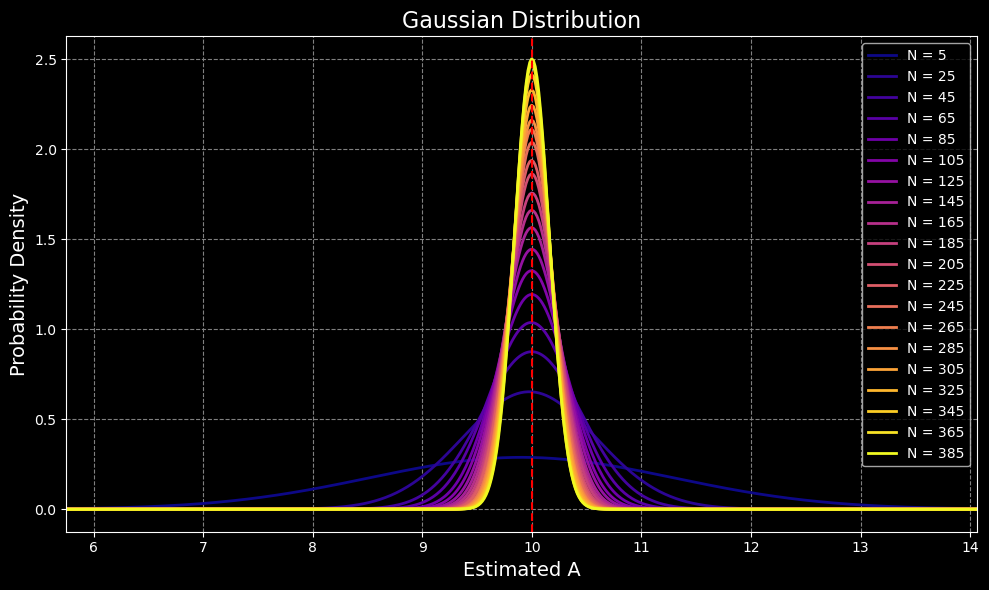

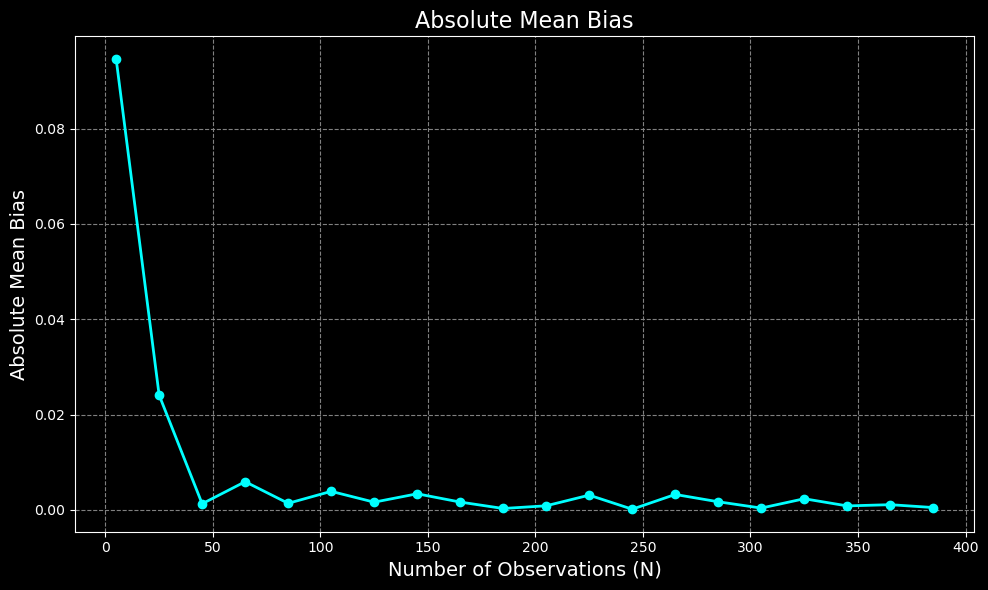

In [24]:
def main():
    np.random.seed(625)
    true_A = 10
    N_values = np.arange(5, 400, 20) 
    num_trials = len(N_values)
    M = 10000  
    means = np.zeros(num_trials)
    std_devs = np.zeros(num_trials)
    for i, N in enumerate(N_values):
        estimates = generate_estimates(true_A, N, M)  
        means[i], std_devs[i] = calculate_statistics(estimates)  
    plot_gaussian_distributions(N_values, means, std_devs, true_A)
    plot_mean_bias(N_values, means, true_A)


if __name__ == "__main__":
    main()